In [95]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [96]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [97]:
# data import
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [98]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [99]:
# pre prcoess the data
# remove the deck column
df.drop('deck', axis=1, inplace=True)


In [100]:
# impute missing values in age and fare
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
# impute missing values in embark and embarked town
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [101]:
# encode the categorical variables using for loop where object and categoy datatypes are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [102]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [103]:
# X and y column
X = df.drop('survived', axis=1)
y = df['survived']

In [104]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


In [105]:
print(X)

     pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         3    1  22.0      1      0   7.2500         2      2    1   
1         1    0  38.0      1      0  71.2833         0      0    2   
2         3    0  26.0      0      0   7.9250         2      2    2   
3         1    0  35.0      1      0  53.1000         2      0    2   
4         3    1  35.0      0      0   8.0500         2      2    1   
..      ...  ...   ...    ...    ...      ...       ...    ...  ...   
886       2    1  27.0      0      0  13.0000         2      1    1   
887       1    0  19.0      0      0  30.0000         2      0    2   
888       3    0  28.0      1      2  23.4500         2      2    2   
889       1    1  26.0      0      0  30.0000         0      0    1   
890       3    1  32.0      0      0   7.7500         1      2    1   

     adult_male  embark_town  alive  alone  
0          True            2      0  False  
1         False            0      1  False  
2         Fa

In [106]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:
# model call
model = LogisticRegression()

In [108]:
# train the model
model.fit(X_train, y_train)

c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
# predict the values
y_pred = model.predict(X_test)

In [110]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[115   0]
 [  0  64]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

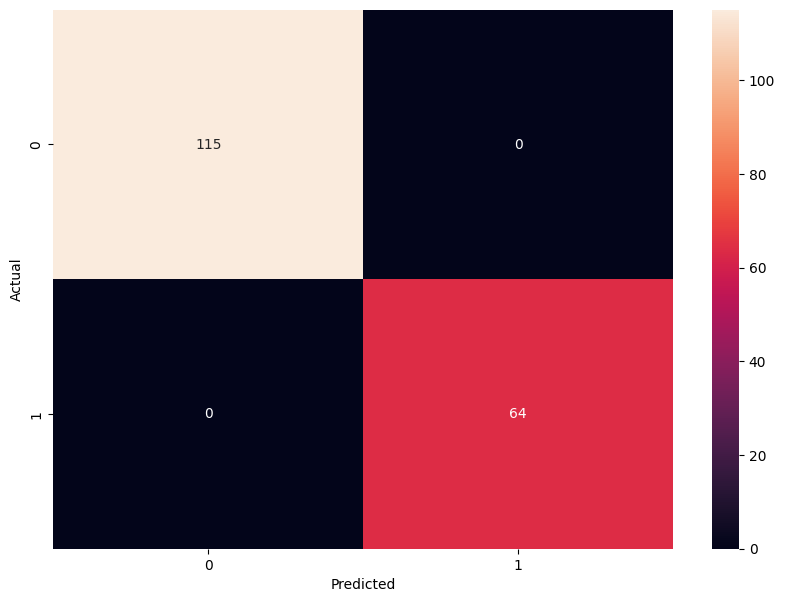

In [111]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [112]:
# save the model
import pickle
filename = 'Logistic_Regression.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)